In [1]:
# Importing Libraries:
import pandas as pd
import openpyxl
import os
import sqlalchemy
import pymysql
import sqlalchemy as db
import sqlite3
import sqlitecloud
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,chi2,f_regression
import seaborn as sns

In [2]:
# Import Dataset as DataFrame:
data_train = pd.read_csv("train.csv")
df_data_train = pd.DataFrame(data_train)

# Print Dataset Head:
df_data_train.head()

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


In [3]:
# Create Database Called practical:
engine = db.create_engine('sqlite:///practical.db')

In [4]:
# Create Connection for Database practical:
conn = engine.connect()

In [5]:
# Obtain Metadata Object:
meta_data = db.MetaData()

# Create Train Data SQLITE Table:

In [6]:
# Create Table for Train_Data Using SQLAlchemy:

train_data = db.Table(
    'Train_data', meta_data,
    db.Column('x', db.Float()),
    db.Column('y1', db.Float()),
    db.Column('y2', db.Float()),
    db.Column('y3', db.Float()),
    db.Column('y4', db.Float())
)

In [7]:
# Meta_Data Create All:
meta_data.create_all(engine)

In [8]:
df_data_train_dict = df_data_train.to_dict('records')

In [9]:
#print(df_data_train_dict)

In [10]:
insert_train = conn.execute(train_data.insert(), df_data_train_dict)

In [11]:
table_train = db.Table("Train_data", meta_data, autoload_with = engine)

In [12]:
query_train = db.select([table_train])

In [13]:
result_train = conn.execute(query_train)

In [14]:
result_train_set = result_train.fetchall()

In [15]:
print(result_train_set)

[(-20.0, 39.778572, -40.07859, -20.214268, -0.32491425), (-19.9, 39.604813, -39.784, -20.07095, -0.058819864), (-19.8, 40.09907, -40.018845, -19.906782, -0.4518296), (-19.7, 40.1511, -39.518402, -19.389118, -0.6120442), (-19.6, 39.795662, -39.360065, -19.81589, -0.3060756), (-19.5, 39.340855, -38.90581, -19.287113, -0.062154666), (-19.4, 39.25246, -39.12036, -19.683708, 0.026392838), (-19.3, 38.590164, -38.62107, -19.494537, -0.2690418), (-19.2, 38.893463, -38.806778, -19.533716, 0.08567329), (-19.1, 38.364567, -38.354656, -18.75372, -0.29954198), (-19.0, 38.13553, -37.795067, -19.363068, -0.553223), (-18.9, 37.825813, -37.984848, -18.528309, 0.040018722), (-18.8, 37.672874, -37.855568, -18.92033, 0.0705662), (-18.7, 37.99707, -37.64723, -18.858202, 0.09534555), (-18.6, 37.38134, -37.436577, -18.457552, -0.3021374), (-18.5, 37.429653, -37.083054, -18.551897, -0.001835507), (-18.4, 37.330147, -36.65041, -18.406178, 0.34796613), (-18.3, 36.635334, -36.5591, -18.573486, 0.08883932), (-18.

In [16]:
#result_tr = df_data_train.to_sql("example", engine, if_exists='replace', index=False)

In [17]:
#print(result_tr)

# Create Ideal Data SQLITE Table:

In [18]:
# Import Ideal Data as DataFrame:
data_ideal = pd.read_csv("ideal.csv")
df_data_ideal = pd.DataFrame(data_ideal)

# Print Dataset Head:
df_data_ideal.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [19]:
df_data_ideal_dict = df_data_ideal.to_dict('records')

In [20]:
#print(df_data_ideal_dict)

In [21]:
# Create Table for Ideal_Data Using SQLAlchemy:

ideal_data = db.Table(
    'Ideal_data', meta_data,
    db.Column('x', db.Float()), db.Column('y1', db.Float()), db.Column('y2', db.Float()), db.Column('y3', db.Float()),
    db.Column('y4', db.Float()), db.Column('y5', db.Float()), db.Column('y6', db.Float()), db.Column('y7', db.Float()),
    db.Column('y8', db.Float()), db.Column('y9', db.Float()), db.Column('y10', db.Float()), db.Column('y11', db.Float()), 
    db.Column('y12', db.Float()), db.Column('y13', db.Float()), db.Column('y14', db.Float()), db.Column('y15', db.Float()),
    db.Column('y16', db.Float()), db.Column('y17', db.Float()), db.Column('y18', db.Float()), db.Column('y19', db.Float()),
    db.Column('y20', db.Float()), db.Column('y21', db.Float()), db.Column('y22', db.Float()), db.Column('y23', db.Float()),
    db.Column('y24', db.Float()), db.Column('y25', db.Float()), db.Column('y26', db.Float()), db.Column('y27', db.Float()),
    db.Column('y28', db.Float()), db.Column('y29', db.Float()), db.Column('y30', db.Float()), db.Column('y31', db.Float()),
    db.Column('y32', db.Float()), db.Column('y33', db.Float()), db.Column('y34', db.Float()), db.Column('y35', db.Float()),
    db.Column('y36', db.Float()), db.Column('y37', db.Float()), db.Column('y38', db.Float()), db.Column('y39', db.Float()),
    db.Column('y40', db.Float()), db.Column('y41', db.Float()), db.Column('y42', db.Float()), db.Column('y43', db.Float()),
    db.Column('y44', db.Float()), db.Column('y45', db.Float()), db.Column('y46', db.Float()), db.Column('y47', db.Float()), 
    db.Column('y48', db.Float()), db.Column('y49', db.Float()), db.Column('y50', db.Float()),
)

In [22]:
insert_ideal = conn.execute(ideal_data.insert(), df_data_ideal_dict)

In [23]:
table_ideal = db.Table("Ideal_data", meta_data, autoload_with = engine)

In [24]:
query_ideal = db.select([table_ideal])

In [25]:
result_ideal = conn.execute(query_ideal)

In [26]:
result_ideal_set = result_ideal.fetchall()

In [27]:
print(result_ideal_set)

[(-20.0, -0.9129453, 0.40808207, 9.087055, 5.408082, -9.087055, 0.9129453, -0.8390715, -0.85091937, 0.81616414, 18.258905, -20.0, -58.0, -45.0, 20.0, 13.0, 400.0, -400.0, 800.0, 410.0, 289.0, -8000.0, 8000.0, 8000.0, -16000.0, -23995.0, -5832.0, 10648.0, -8020.0, -7600.0, -8795.0, 20.0, 4.472136, 20.12461, -0.7464143, 10.0, 100.0, -20.0, -1.3210273, 399.08707, 899.5919, -40.456474, 40.20404, 2.9957323, -0.008333334, 12.995732, 5.2983174, -5.2983174, -0.18627828, 0.9129453, 0.3968496), (-19.9, -0.8676441, 0.4971858, 9.132356, 5.4971857, -9.132356, 0.8676441, -0.8652126, 0.16851768, 0.9943716, 17.266117, -19.9, -57.7, -44.8, 19.9, 12.95, 396.01, -396.01, 792.02, 406.01, 285.61, -7880.599, 7880.599, 7880.599, -15761.198, -23636.797, -5735.339, 10503.459, -7900.499, -7484.589, -8667.619, 19.9, 4.460942, 20.025234, -0.6204504, 9.9, 99.5, -19.9, -1.3648299, 395.14236, 893.5128, -40.23382, 40.04859, 2.9907198, -0.008340283, 12.99072, 5.293305, -5.293305, -0.21569017, 0.8676441, 0.47695395), (

# Delete Queries:

## Train Data:

# Delete Data from Train Data:
delete_train = train_data.delete()

# Execute Delection from Train Data:
deleted_train = conn.execute(delete_train)

# Query from Train Data:
table_train = db.Table("Train_data", meta_data, autoload_with = engine)
query_train = db.select([table_train])
result_train = conn.execute(query_train)
result_train_set = result_train.fetchall()
print(result_train_set)

## Ideal Data:

# Delete Data from Ideal Data:
delete_ideal = ideal_data.delete()

# Execute Delection from Ideal Data:
deleted_ideal = conn.execute(delete_ideal)

# Query from Train Data:
table_ideal = db.Table("Ideal_data", meta_data, autoload_with = engine)
query_ideal = db.select([table_ideal])
result_ideal = conn.execute(query_ideal)
result_ideal_set = result_ideal.fetchall()
print(result_ideal_set)

# See Info in Database:

In [28]:
for t in meta_data.tables:
    print("Tables: ", t)

Tables:  Train_data
Tables:  Ideal_data


# Data Analysis of Training Data:

In [29]:
# Create DataFrame from Train_data SQL Table:
df_training_data = pd.DataFrame(result_train_set)

In [30]:
# Checking Data Head of Training Dataset:
df_training_data.head()

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


In [31]:
# Checking Description Summary of Training Dataset:
df_training_data.describe()

,x,y1,y2,y3,y4
count,400.00000,400.000000,400.000000,400.000000,400.000000
mean,-0.05000,0.107666,-0.094239,-0.051628,0.012633
std,11.56143,23.103285,23.111794,11.560369,0.327063
min,-20.00000,-39.724934,-40.078590,-20.214268,-0.744510
25%,-10.02500,-20.312566,-19.642560,-9.999807,-0.198240
50%,-0.05000,0.367844,-0.000603,-0.155205,0.024634
75%,9.92500,19.606209,19.478971,9.992209,0.236008
max,19.90000,40.151100,40.558865,19.840752,0.742489


In [32]:
# Checking Standard Deviation of Training Dataset:
df_training_data.describe().loc[["std"]]

,x,y1,y2,y3,y4
std,11.56143,23.103285,23.111794,11.560369,0.327063


In [33]:
df_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


# Feature Engineering of Training Data:

## Standardization Method:

In [34]:
# Standardization Object:
std_scalar = StandardScaler()

In [35]:
# Standardization of Training Data:
df_training_data_std = std_scalar.fit_transform(df_training_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
# Standardized (Transformed) Data:
df_training_data_std = pd.DataFrame(df_training_data_std, columns = df_training_data.columns)

In [37]:
# Standardized Data Head:
df_training_data_std.head()

,x,y1,y2,y3,y4
0,-1.727726,1.719261,-1.732208,-1.746302,-1.033349
1,-1.719066,1.711731,-1.719445,-1.733889,-0.218742
2,-1.710406,1.733151,-1.729619,-1.719670,-1.421881
3,-1.701745,1.735406,-1.707939,-1.674835,-1.912354
4,-1.693085,1.720002,-1.701080,-1.711798,-0.975678


In [38]:
# Standardized Data Description:
df_training_data_std.describe()

,x,y1,y2,y3,y4
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,9.992007e-18,-1.754152e-16,-5.717649e-16,3.663736e-16,-4.440892e-18
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.727726e+00,-1.726269e+00,-1.732208e+00,-1.746302e+00,-2.317879e+00
25%,-8.638630e-01,-8.849740e-01,-8.468750e-01,-8.616193e-01,-6.455540e-01
50%,1.224888e-14,1.127563e-02,4.056514e-03,-8.970876e-03,3.673977e-02
75%,8.638630e-01,8.450297e-01,8.479533e-01,8.699044e-01,6.838307e-01
max,1.727726e+00,1.735406e+00,1.761179e+00,1.722894e+00,2.234345e+00


In [39]:
# Training Input Data:
x_train = df_training_data_std[["x"]]

In [40]:
# Training Input Data Head:
x_train.head()

,x
0,-1.727726
1,-1.719066
2,-1.710406
3,-1.701745
4,-1.693085


In [41]:
# Training Output Data:
y_train = df_training_data_std.iloc[:,[1,2,3,4]]

In [42]:
# Training Output Data Head:
y_train.head()

,y1,y2,y3,y4
0,1.719261,-1.732208,-1.746302,-1.033349
1,1.711731,-1.719445,-1.733889,-0.218742
2,1.733151,-1.729619,-1.719670,-1.421881
3,1.735406,-1.707939,-1.674835,-1.912354
4,1.720002,-1.701080,-1.711798,-0.975678


## Min & Max Method:

In [43]:
# Min and Max Object:
min_max_sca = MinMaxScaler()

In [44]:
# Min and Max of Training Data:
df_training_data_mm = min_max_sca.fit_transform(df_training_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
# Min and Max (Transformed) Data:
df_training_data_mm = pd.DataFrame(df_training_data_mm, columns = df_training_data.columns)

In [46]:
# Min and Max Data Head:
df_training_data_mm.head()

,x,y1,y2,y3,y4
0,0.000000,0.995336,0.000000,0.000000,0.282176
1,0.002506,0.993161,0.003653,0.003578,0.461123
2,0.005013,0.999349,0.000741,0.007677,0.196826
3,0.007519,1.000000,0.006947,0.020600,0.089083
4,0.010025,0.995550,0.008911,0.009946,0.294845


In [47]:
# Min and Max Data Description:
df_training_data_mm.describe()

,x,y1,y2,y3,y4
count,400.00000,400.000000,400.000000,400.000000,400.000000
mean,0.50000,0.498680,0.495853,0.503374,0.509175
std,0.28976,0.289239,0.286614,0.288612,0.219948
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.243031,0.253431,0.255011,0.367364
50%,0.50000,0.501938,0.497015,0.500788,0.517246
75%,0.75000,0.742790,0.738584,0.754125,0.659394
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Training Input Data:
x_train_mm = df_training_data_mm[["x"]]

In [49]:
# Training Input Data Head:
x_train_mm.head()

,x
0,0.000000
1,0.002506
2,0.005013
3,0.007519
4,0.010025


In [50]:
# Training Output Data:
y_train_mm = df_training_data_mm.iloc[:,[1,2,3,4]]

In [51]:
# Training Output Data Head:
y_train_mm.head()

,y1,y2,y3,y4
0,0.995336,0.000000,0.000000,0.282176
1,0.993161,0.003653,0.003578,0.461123
2,0.999349,0.000741,0.007677,0.196826
3,1.000000,0.006947,0.020600,0.089083
4,0.995550,0.008911,0.009946,0.294845


# Linear Regression Model Training and Execution:

In [52]:
# Linear Regression Object:
lin_reg = LinearRegression()

## Using Non-Feature Engineered Training Data:

In [53]:
# Normal Training Input Data:
x_train_normal = df_training_data[["x"]]

In [54]:
# Normal Training Input Data Head:
x_train_normal.head()

,x
0,-20.0
1,-19.9
2,-19.8
3,-19.7
4,-19.6


In [55]:
# Normal Training Output Data:
y_train_normal = df_training_data.iloc[:,[1,2,3,4]]

In [56]:
# Normal Training Output Data Head:
y_train_normal.head()

,y1,y2,y3,y4
0,39.778572,-40.078590,-20.214268,-0.324914
1,39.604813,-39.784000,-20.070950,-0.058820
2,40.099070,-40.018845,-19.906782,-0.451830
3,40.151100,-39.518402,-19.389118,-0.612044
4,39.795662,-39.360065,-19.815890,-0.306076


In [57]:
# Linear Regression Fitting of Normal Training Data:
lr_model_normal = lin_reg.fit(x_train_normal, y_train_normal)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
# Linear Regression Training Model Score (Using Normal Training Data):
lr_model_normal.score(x_train_normal, y_train_normal)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.7502574936339411

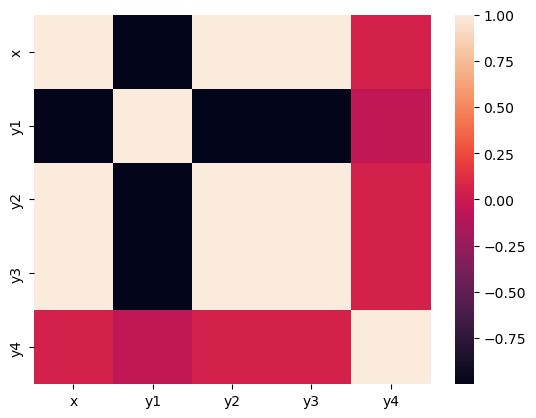

In [59]:
# Linear Regression Training Model Heatmap Results:
sns.heatmap(pd.concat([x_train_normal,y_train_normal],axis=1).corr())
plt.show()

In [60]:
# Get intercepts for the functions:
intercept_normal = lr_model_normal.intercept_
df_intercept_normal = pd.DataFrame(intercept_normal)
df_intercept_normal.head()

,0
0,0.007771
1,0.005693
2,-0.001647
3,0.012702


In [61]:
# Get coefficients for the functions:
coeff_normal = lr_model_normal.coef_
df_coeff_normal = pd.DataFrame(coeff_normal)
df_coeff_normal.head()

,0
0,-1.997898
1,1.998639
2,0.999628
3,0.001387


In [62]:
y1_normal_train_pred = ((coeff_normal[0] * x_train_normal[["x"]]) + intercept_normal[0])
y2_normal_train_pred = ((coeff_normal[1] * x_train_normal[["x"]]) + intercept_normal[1])
y3_normal_train_pred = ((coeff_normal[2] * x_train_normal[["x"]]) + intercept_normal[2])
y4_normal_train_pred = ((coeff_normal[3] * x_train_normal[["x"]]) + intercept_normal[3])

In [63]:
y1_normal_train_pred.rename(columns={"x":"y1"}, inplace = True)
y2_normal_train_pred.rename(columns={"x":"y2"}, inplace = True)
y3_normal_train_pred.rename(columns={"x":"y3"}, inplace = True)
y4_normal_train_pred.rename(columns={"x":"y4"}, inplace = True)

In [64]:
pred_normal = pd.concat([df_training_data["x"], y1_normal_train_pred, y2_normal_train_pred, y3_normal_train_pred,
                  y4_normal_train_pred], axis=1, join='inner')

display(pred_normal)

,x,y1,y2,y3,y4
0,-20.0,39.965734,-39.967084,-19.994212,-0.015033
1,-19.9,39.765944,-39.767220,-19.894249,-0.014894
2,-19.8,39.566154,-39.567356,-19.794286,-0.014756
3,-19.7,39.366365,-39.367492,-19.694323,-0.014617
4,-19.6,39.166575,-39.167628,-19.594361,-0.014478
...,...,...,...,...,...
395,19.5,-38.951243,38.979150,19.491104,0.039744
396,19.6,-39.151032,39.179014,19.591067,0.039883
397,19.7,-39.350822,39.378878,19.691030,0.040021
398,19.8,-39.550612,39.578742,19.790992,0.040160


In [65]:
pred_normal.describe()

,x,y1,y2,y3,y4
count,400.00000,400.000000,400.000000,400.000000,400.000000
mean,-0.05000,0.107666,-0.094239,-0.051628,0.012633
std,11.56143,23.098560,23.107123,11.557132,0.016033
min,-20.00000,-39.750402,-39.967084,-19.994212,-0.015033
25%,-10.02500,-19.821368,-20.030661,-10.022920,-0.001200
50%,-0.05000,0.107666,-0.094239,-0.051628,0.012633
75%,9.92500,20.036700,19.842183,9.919663,0.026466
max,19.90000,39.965734,39.778606,19.890955,0.040299


## Using Standardization Training Data:

In [66]:
# Linear Regression Fitting of Standardized Training Data:
lr_model_std = lin_reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [67]:
# Linear Regression Training Model Score (Using Training Data):
lr_model_std.score(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.750257493633941

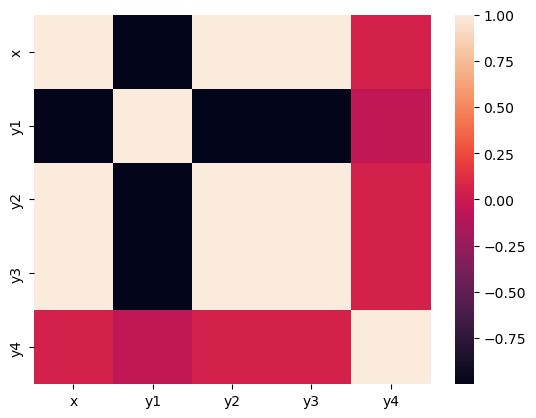

In [68]:
# Linear Regression Training Model Heatmap Results:
sns.heatmap(pd.concat([x_train,y_train],axis=1).corr())
plt.show()

In [69]:
# Get intercepts for the functions:
intercept_std = lr_model_std.intercept_
df_intercept_std = pd.DataFrame(intercept_std)
df_intercept_std.head()

,0
0,7.105427e-17
1,0.000000e+00
2,-1.421085e-16
3,1.332268e-17


In [70]:
# Get coefficients for the functions:
coeff_std = lr_model_std.coef_
df_coeff_std = pd.DataFrame(coeff_std)
df_coeff_std.head()

,0
0,-0.999795
1,0.999798
2,0.999720
3,0.049021


In [71]:
coeff_std[0]

array([-0.99979545])

In [72]:
print(intercept_std[0])

7.105427357601002e-17


In [73]:
y1_std_train_pred = (coeff_std[0] * x_train[["x"]]) + intercept_std[0]
y2_std_train_pred = (coeff_std[1] * x_train[["x"]]) + intercept_std[1]
y3_std_train_pred = (coeff_std[2] * x_train[["x"]]) + intercept_std[2]
y4_std_train_pred = (coeff_std[3] * x_train[["x"]]) + intercept_std[3]

In [74]:
y1_std_train_pred.rename(columns={"x":"y1"}, inplace = True)
y2_std_train_pred.rename(columns={"x":"y2"}, inplace = True)
y3_std_train_pred.rename(columns={"x":"y3"}, inplace = True)
y4_std_train_pred.rename(columns={"x":"y4"}, inplace = True)

In [75]:
pred_std = pd.concat([df_training_data["x"], y1_std_train_pred, y2_std_train_pred, y3_std_train_pred,
                  y4_std_train_pred], axis=1, join='inner')

display(pred_std)

,x,y1,y2,y3,y4
0,-20.0,1.727373,-1.727377,-1.727242,-0.084695
1,-19.9,1.718714,-1.718718,-1.718585,-0.084270
2,-19.8,1.710056,-1.710060,-1.709927,-0.083846
3,-19.7,1.701397,-1.701401,-1.701269,-0.083421
4,-19.6,1.692739,-1.692743,-1.692611,-0.082997
...,...,...,...,...,...
395,19.5,-1.692739,1.692743,1.692611,0.082997
396,19.6,-1.701397,1.701401,1.701269,0.083421
397,19.7,-1.710056,1.710060,1.709927,0.083846
398,19.8,-1.718714,1.718718,1.718585,0.084270


In [76]:
pred_std.describe()

,x,y1,y2,y3,y4
count,400.00000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-0.05000,8.881784e-17,8.104628e-17,-1.415534e-16,9.194034e-18
std,11.56143,1.001048e+00,1.001050e+00,1.000972e+00,4.908229e-02
min,-20.00000,-1.727373e+00,-1.727377e+00,-1.727242e+00,-8.469468e-02
25%,-10.02500,-8.636863e-01,-8.636885e-01,-8.636212e-01,-4.234734e-02
50%,-0.05000,-1.217516e-14,1.224541e-14,1.210230e-14,6.137668e-16
75%,9.92500,8.636863e-01,8.636885e-01,8.636212e-01,4.234734e-02
max,19.90000,1.727373e+00,1.727377e+00,1.727242e+00,8.469468e-02


## Using Min-Max Training Data:

In [77]:
# Linear Regression Fitting of Min-Max Training Data:
lin_reg.fit(x_train_mm, y_train_mm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [78]:
# Linear Regression Training Model Score (Using Standardized Data):
lin_reg.score(x_train_mm, y_train_mm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.750257493633941

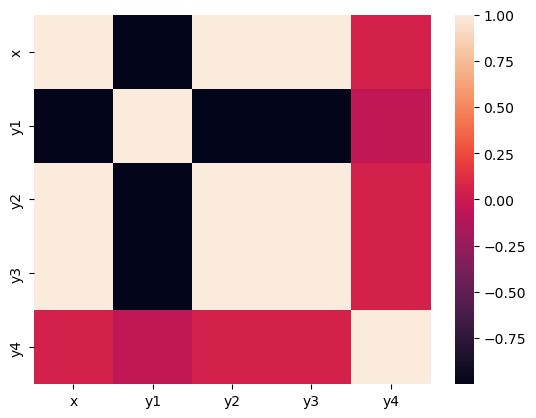

In [79]:
# Linear Regression Training Model Heatmap Results:
sns.heatmap(pd.concat([x_train_mm,y_train_mm],axis=1).corr())
plt.show()

# Data Analysis of Ideal Data:

In [80]:
# Create DataFrame from Ideal_data SQL Table:
df_ideal_data2 = pd.DataFrame(result_ideal_set)

In [81]:
# Checking Data Head of Ideal Dataset:
df_ideal_data2.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [82]:
# Checking Description Summary of Ideal Dataset:
df_ideal_data2.describe()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.05000,-0.002282,0.045609,9.997718,5.045609,-9.997718,0.002282,-0.054391,0.030726,0.091218,...,-0.101141,0.122805,1.933863,-0.010131,11.933863,4.236448,-4.236448,-0.000466,0.029571,0.040336
std,11.56143,0.701386,0.713074,0.701386,0.713074,0.701386,0.701386,0.721907,0.717805,1.426147,...,23.109814,23.126395,1.814762,0.001190,1.814762,1.814762,1.814762,0.178079,0.700764,0.628002
min,-20.00000,-0.999990,-0.999968,9.000010,4.000032,-10.999990,-0.999990,-0.999965,-0.999998,-1.999937,...,-40.456474,-39.551407,-28.889038,-0.012484,-18.889038,-26.586452,-5.298317,-0.249998,-0.999990,-0.841454
25%,-10.02500,-0.695113,-0.669387,9.304887,4.330613,-10.689206,-0.689206,-0.801144,-0.672318,-1.338774,...,-19.767859,-20.288331,1.609438,-0.011102,11.609438,3.912023,-5.010635,-0.179723,-0.682927,-0.620496
50%,-0.05000,-0.003982,0.095868,9.996018,5.095868,-9.996018,0.003982,-0.095871,0.038803,0.191735,...,-0.124958,0.598751,2.302585,-0.009995,12.302585,4.605170,-4.605170,-0.001106,0.099833,0.095717
75%,9.92500,0.689206,0.753902,10.689206,5.753902,-9.304887,0.695113,0.672522,0.775285,1.507804,...,19.610421,19.637776,2.708050,-0.009089,12.708050,5.010635,-3.912023,0.178177,0.722881,0.684489
max,19.90000,0.999990,1.000000,10.999990,6.000000,-9.000010,0.999990,1.000000,0.999993,2.000000,...,40.233820,40.204040,2.995732,-0.008333,12.995732,5.298317,26.586452,0.249998,0.999574,0.841471


In [83]:
# Checking Standard Deviation of Ideal Dataset:
df_ideal_data2.describe().loc[["std"]]

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
std,11.56143,0.701386,0.713074,0.701386,0.713074,0.701386,0.701386,0.721907,0.717805,1.426147,...,23.109814,23.126395,1.814762,0.00119,1.814762,1.814762,1.814762,0.178079,0.700764,0.628002


In [84]:
df_ideal_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
 5   y5      400 non-null    float64
 6   y6      400 non-null    float64
 7   y7      400 non-null    float64
 8   y8      400 non-null    float64
 9   y9      400 non-null    float64
 10  y10     400 non-null    float64
 11  y11     400 non-null    float64
 12  y12     400 non-null    float64
 13  y13     400 non-null    float64
 14  y14     400 non-null    float64
 15  y15     400 non-null    float64
 16  y16     400 non-null    float64
 17  y17     400 non-null    float64
 18  y18     400 non-null    float64
 19  y19     400 non-null    float64
 20  y20     400 non-null    float64
 21  y21     400 non-null    float64
 22  y2

# Linear Regression Model Training and Execution (Ideal Dataset):

In [85]:
# Linear Regression Object:
lin_reg = LinearRegression()

## Using Non-Feature Engineered Training Data:

In [86]:
# Normal Ideal Input Data:
x_ideal_normal = df_ideal_data2[["x"]]

In [87]:
# Normal Ideal Input Data Head:
x_ideal_normal.head()

,x
0,-20.0
1,-19.9
2,-19.8
3,-19.7
4,-19.6


In [88]:
# Normal Ideal Output Data:
y_ideal_normal = df_ideal_data2.iloc[:,[1,2,3,4]]

In [89]:
# Normal Ideal Output Data Head:
y_ideal_normal.head()

,y1,y2,y3,y4
0,-0.912945,0.408082,9.087055,5.408082
1,-0.867644,0.497186,9.132356,5.497186
2,-0.813674,0.581322,9.186326,5.581322
3,-0.751573,0.659649,9.248426,5.659649
4,-0.681964,0.731386,9.318036,5.731386


In [90]:
# Linear Regression Fitting of Ideal Training Data:
lr_model_normal_ideal = lin_reg.fit(x_ideal_normal, y_ideal_normal)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [91]:
# Linear Regression Training Model Score (Using Normal Ideal Data):
lr_model_normal_ideal.score(x_ideal_normal, y_ideal_normal)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.0010048114682976172

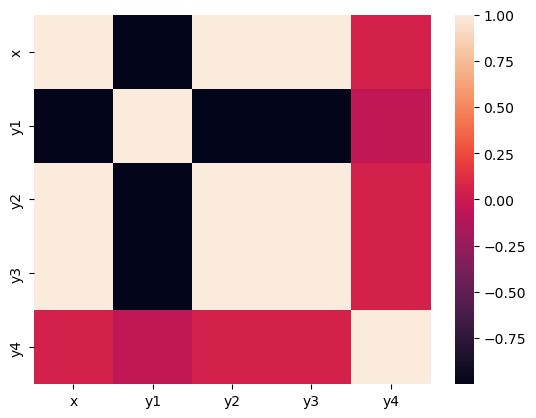

In [92]:
# Linear Regression Training Model Heatmap Results:
sns.heatmap(pd.concat([x_train_normal,y_train_normal],axis=1).corr())
plt.show()

# Feature Engineering of Ideal Data:

## Standardization Method:

In [93]:
# Standardization of ideal Data:
df_ideal_data2_std = std_scalar.fit_transform(df_ideal_data2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [94]:
# Standardized (Transformed) Data:
df_ideal_data2_std = pd.DataFrame(df_ideal_data2_std, columns = df_ideal_data2.columns)

In [95]:
# Standardized Data Head:
df_ideal_data2_std.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-1.727726,-1.300003,0.508961,-1.300003,0.508961,1.300003,1.300003,-1.088317,-1.229790,0.508961,...,-1.748429,1.735309,0.585861,1.512910,0.585861,0.585861,-0.585861,-1.044735,1.262166,0.568407
1,-1.719066,-1.235334,0.634075,-1.235334,0.634075,1.235334,1.235334,-1.124574,0.192203,0.634075,...,-1.738782,1.728578,0.583096,1.507063,0.583096,0.583096,-0.583096,-1.210104,1.197439,0.696121
2,-1.710406,-1.158289,0.752214,-1.158290,0.752213,1.158290,1.158289,-1.157831,0.811353,0.752214,...,-1.728948,1.721741,0.580316,1.501205,0.580316,0.580316,-0.580316,-1.327125,1.120326,0.811193
3,-1.701745,-1.069639,0.862196,-1.069640,0.862196,1.069640,1.069639,-1.188006,-1.430303,0.862196,...,-1.718938,1.714778,0.577523,1.495338,0.577523,0.577523,-0.577523,-1.391134,1.031597,0.912770
4,-1.693085,-0.970269,0.962924,-0.970269,0.962924,0.970269,0.970269,-1.215022,1.037274,0.962924,...,-1.708765,1.707671,0.574715,1.489460,0.574715,0.574715,-0.574715,-1.399578,0.932139,1.000558


In [96]:
# Standardized Data Description:
df_ideal_data2_std.describe()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,...,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,9.992007e-18,-9.436896e-18,-3.635980e-17,1.144640e-15,-5.054290e-16,-1.144640e-15,9.436896e-18,7.438494e-17,2.164935e-17,4.912737e-17,...,-2.359224e-16,-9.436896e-17,-6.189493e-17,2.253753e-16,1.218192e-15,7.133183e-17,-7.133183e-17,4.551914e-17,-9.936496e-17,7.216450e-18
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,...,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.727726e+00,-1.424263e+00,-1.468133e+00,-1.424262e+00,-1.468134e+00,-1.430779e+00,-1.430779e+00,-1.311469e+00,-1.437736e+00,-1.468133e+00,...,-1.748429e+00,-1.717687e+00,-1.700581e+01,-1.979792e+00,-1.700581e+01,-1.700581e+01,-5.858614e-01,-1.402998e+00,-1.471038e+00,-1.405877e+00
25%,-8.638630e-01,-9.890391e-01,-1.003952e+00,-9.890391e-01,-1.003952e+00,-9.871233e-01,-9.871235e-01,-1.035713e+00,-9.806620e-01,-1.003952e+00,...,-8.520773e-01,-8.836958e-01,-1.789938e-01,-8.165287e-01,-1.789938e-01,-1.789939e-01,-4.271396e-01,-1.007876e+00,-1.018018e+00,-1.053594e+00
50%,1.224888e-14,-2.425707e-03,7.056949e-02,-2.425578e-03,7.056945e-02,2.425578e-03,2.425707e-03,-5.753107e-02,1.126683e-02,7.056949e-02,...,-1.031899e-03,2.060600e-02,2.034338e-01,1.147806e-01,2.034337e-01,2.034338e-01,-2.034338e-01,-3.602448e-03,1.003907e-01,8.829784e-02
75%,8.638630e-01,9.871235e-01,9.945399e-01,9.871233e-01,9.945401e-01,9.890391e-01,9.890391e-01,1.008195e+00,1.038571e+00,9.945399e-01,...,8.540202e-01,8.448966e-01,4.271396e-01,8.772236e-01,4.271395e-01,4.271396e-01,1.789939e-01,1.004425e+00,9.906021e-01,1.027003e+00
max,1.727726e+00,1.430779e+00,1.340095e+00,1.430779e+00,1.340095e+00,1.424262e+00,1.424263e+00,1.462393e+00,1.352011e+00,1.340095e+00,...,1.747547e+00,1.735309e+00,5.858614e-01,1.512910e+00,5.858612e-01,5.858614e-01,1.700581e+01,1.408235e+00,1.385940e+00,1.277287e+00


In [97]:
# Ideal Input Data:
x_ideal_std = df_ideal_data2_std[["x"]]

In [98]:
# Ideal Input Data Head:
x_ideal_std.head()

,x
0,-1.727726
1,-1.719066
2,-1.710406
3,-1.701745
4,-1.693085


In [99]:
# Ideal Output Data:
y_ideal_std = df_ideal_data2_std.iloc[:,1:]

In [100]:
# Ideal Output Data Head:
y_ideal_std.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-1.300003,0.508961,-1.300003,0.508961,1.300003,1.300003,-1.088317,-1.229790,0.508961,2.346110,...,-1.748429,1.735309,0.585861,1.512910,0.585861,0.585861,-0.585861,-1.044735,1.262166,0.568407
1,-1.235334,0.634075,-1.235334,0.634075,1.235334,1.235334,-1.124574,0.192203,0.634075,2.221025,...,-1.738782,1.728578,0.583096,1.507063,0.583096,0.583096,-0.583096,-1.210104,1.197439,0.696121
2,-1.158289,0.752214,-1.158290,0.752213,1.158290,1.158289,-1.157831,0.811353,0.752214,2.075456,...,-1.728948,1.721741,0.580316,1.501205,0.580316,0.580316,-0.580316,-1.327125,1.120326,0.811193
3,-1.069639,0.862196,-1.069640,0.862196,1.069640,1.069639,-1.188006,-1.430303,0.862196,1.911067,...,-1.718938,1.714778,0.577523,1.495338,0.577523,0.577523,-0.577523,-1.391134,1.031597,0.912770
4,-0.970269,0.962924,-0.970269,0.962924,0.970269,0.970269,-1.215022,1.037274,0.962924,1.729699,...,-1.708765,1.707671,0.574715,1.489460,0.574715,0.574715,-0.574715,-1.399578,0.932139,1.000558


## Using Standardization Training Data:

In [101]:
# Linear Regression Fitting of Standardized Ideal Data:
lr_model_std_ideal = lin_reg.fit(x_ideal_std, y_ideal_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [102]:
# Linear Regression Training Model Score (Using Standardized Ideal Data):
lr_model_std_ideal.score(x_ideal_std, y_ideal_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


0.330707514001337